In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Custom modules
import sys 
sys.path.append('../environments/')
import gridworlds
from dp import policy_evaluation, policy_iteration

# Dynamic Programming

In [2]:
def plot_value_functions(V, env):
    plt.figure(figsize=(9, 7))
    plt.imshow(np.reshape(V[0], env.size), cmap='RdYlGn')
    plt.title('Value-functions after {} interations'.format(V[1]))
    plt.axis('off')
    plt.colorbar()
    plt.show()
    
def print_policy(pi, env):
    pi = np.reshape(np.argmax(pi, axis=1), env.size)
    pi = pi.astype(str)
    pi[pi=="0"] = "U" 
    pi[pi=="1"] = "R" 
    pi[pi=="2"] = "D" 
    pi[pi=="3"] = "L" 
    print(pi)

## Policy evaluation

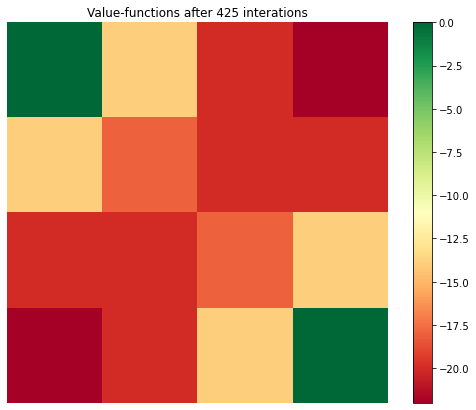

In [3]:
# 4x4 Grid (Sutton & Barto, 2018, page 76) with equiprobable random policy
env = gridworlds.Grid_4x4_Sutton()
pi = np.ones([len(env.state_space()), len(env.action_space())]) / len(env.action_space())
V = policy_evaluation(pi, env, gamma=1)
plot_value_functions(V, env)


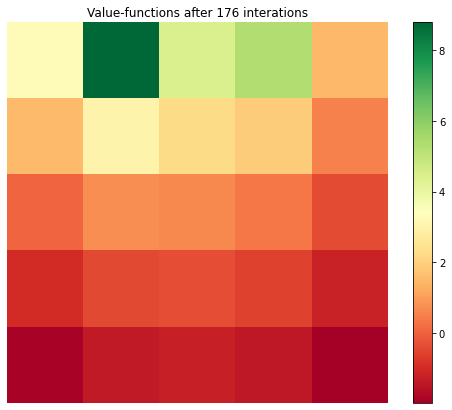

In [4]:
# 5x5 Grid (Sutton & Barto, 2018, page 60) with equiprobable random policy
env = gridworlds.Grid_5x5_Sutton()
pi = np.ones([len(env.state_space()), len(env.action_space())]) / len(env.action_space())
V = policy_evaluation(pi, env, gamma=0.9)
plot_value_functions(V, env)

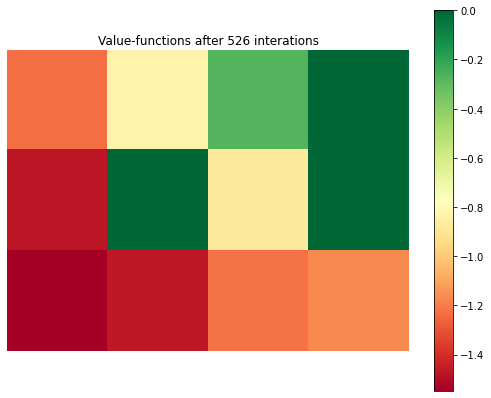

In [5]:
# 3x4 Grid (Russell & Norvig, 2020, page 842) with equiprobable random policy
env = gridworlds.Grid_3x4_RNG()
pi = np.ones([len(env.state_space()), len(env.action_space())]) / len(env.action_space())
V = policy_evaluation(pi, env)
plot_value_functions(V, env)

## Policy Iteration

In [6]:
# 4x4 Grid (Sutton & Barto, 2018, page 76)
env = gridworlds.Grid_4x4_Sutton()
pi = policy_iteration(env)
print_policy(pi, env)

[['U' 'L' 'L' 'D']
 ['U' 'U' 'U' 'D']
 ['U' 'U' 'R' 'D']
 ['U' 'R' 'R' 'U']]


In [7]:
# 5x5 Grid (Sutton & Barto, 2018, page 60)
env = gridworlds.Grid_5x5_Sutton()
pi = policy_iteration(env, gamma=0.9)
print_policy(pi, env)

[['R' 'U' 'L' 'U' 'L']
 ['U' 'U' 'U' 'L' 'L']
 ['U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U']]


In [8]:
# 3x4 Grid (Russell & Norvig, 2020, page 842)
env = gridworlds.Grid_3x4_RNG()
pi = policy_iteration(env)
print_policy(pi, env)

[['R' 'R' 'R' 'U']
 ['U' 'U' 'U' 'U']
 ['U' 'L' 'L' 'L']]
